# 分类Classification

在分类任务中，一个典型的数据集可以表示为$D = \{(x_i , y_i )\}_{i=1}^n$，其中$n$是数据集中实例（或观测、样本）的数量。每个实例由一对$(x_i , y_i )$组成，具体含义如下：

1. **$x_i$**：协变量向量（covariate vector）或特征向量（feature vector）对应第$i$个实例。它通常是一个多维向量，其中包含了描述这个实例的多个特征。例如，在一个关于电子邮件分类的任务中，$x_i$可能包括电子邮件的各种属性，如发件人、邮件长度、特定词汇的使用频率等。

2. **$y_i \in \{-1, 1\}$**：二元标签（binary label）表示第$i$个实例的类别。在二分类任务中，每个实例被标记为两个类别之一，通常用-1和1来表示。例如，在垃圾邮件检测的场景中，$y_i = 1$可能表示一封电子邮件是垃圾邮件，而$y_i = -1$表示它是正常邮件。


- **协变量向量$x_i$**：是对实例的描述，包含了进行分类所需的所有信息。每个维度代表一个特征，这些特征是用来区分不同类别的实例的依据。

- **二元标签$y_i$**：是实例的类别标签，它是预先定义的，通常由专家标注或通过其他方式获取。在训练过程中，这些标签用来指导模型学习如何正确地将特征向量映射到其对应的类别。

- **数据集$D$**：是由多个这样的$(x_i , y_i )$对组成的集合，它为模型的训练提供了必要的信息。通过分析这些数据，分类模型可以学习到不同类别之间在特征空间上的差异，并据此进行预测。

在机器学习中，理解数据集的结构和组成是非常重要的，因为它直接影响到模型的设计、训练过程和最终性能。

# 损失函数Loss Function

在机器学习领域，我们经常需要定义一个损失函数（loss function），以衡量模型预测值与真实值之间的差异。对于分类问题，0-1损失函数是一种直观的选择，它定义如下：

- 当预测正确时，损失为0；
- 当预测错误时，损失为1。

数学上，可以表示为：

$$ L_{0-1}(y, \hat{y}) = \begin{cases} 0, & \text{if } y = \hat{y} \\ 1, & \text{otherwise} \end{cases} $$

其中，$y$是真实标签，$\hat{y}$是预测标签。

## 问题：我们能直接最小化平均0-1损失吗？

**回答：**不行。0-1损失函数是非凸的（non-convex）且不连续的（discontinuous），这意味着我们不能应用(次)梯度方法（(sub)gradient methods）来最小化这个损失函数。非凸性导致优化问题可能有多个局部最小值，使得寻找全局最小值变得困难。而不连续性则意味着函数在某些点附近的变化不是平滑的，这使得无法通过常规的梯度下降方法来寻找最小值。

### 解决方案

由于直接最小化0-1损失函数存在问题，我们通常会使用其他类型的损失函数作为替代，这些替代损失函数被称为“代理损失函数”（surrogate loss functions）。一些常见的代理损失函数包括：

1. **Hinge损失（用于支持向量机SVM）：**

   $$ L_{\text{hinge}}(y, f(x)) = \max(0, 1 - yf(x)) $$
   
   其中，$f(x)$是模型对样本$x$的预测得分，$y \in \{-1, 1\}$是真实标签。Hinge损失鼓励正确分类的样本远离决策边界。
   
   贝叶斯分类器（Bayes classifier）是一种决策规则，它基于预测变量$X$的条件概率来分配类别标签。对于二元分类问题，贝叶斯分类器可以表示为：

$$ f^*(x) = \text{sign}(\eta(x) - \frac{1}{2}) $$


   - $\eta(x) = P(Y=1|X=x)$ 是给定$X=x$时$Y=1$的条件概率。
   - $\text{sign}(z)$是符号函数，当$z>0$时返回1，当$z<0$时返回-1。

     因此，贝叶斯分类器的规则可以解释为：

- 如果给定$X=x$时$Y=1$的条件概率大于0.5（即，$\eta(x) > \frac{1}{2}$），则将$x$分类为1。
- 如果给定$X=x$时$Y=1$的条件概率小于0.5（即，$\eta(x) < \frac{1}{2}$），则将$x$分类为0。

     这表明贝叶斯分类器会将$x$分配给最有可能的类别。

     观察到的特性：

     (i) 上面定义的贝叶斯分类器$f^*$正是我们讨论的最优分类器，它直接根据条件概率$P(Y=1|X=x)$来决定分类，确保了最小的误分类概率。

     (ii) 铰链损失是一个凸函数，这使得在实际应用中最小化训练误差成为可能。凸函数的一个关键特性是它们有一个全局最小值，这使得优化算法（如梯度下降法）可以有效地找到这个最小值。这在机器学习中非常重要，因为它保证了我们可以找到一个好的模型参数配置，以最小化损失函数，并因此提高模型的预测性能。

     总结而言，贝叶斯分类器提供了一种理论上的最优分类方法，通过利用条件概率直接最小化误分类率。而在实际应用中，由于0-1损失函数的不连续性和非凸性，我们经常使用其他凸损失函数（如铰链损失）作为替代，以便利用优化算法找到模型参数的最优解。

2. **Logistic损失（用于逻辑回归）：**

   $$ L_{\text{logistic}}(y, f(x)) = \log(1 + \exp(-yf(x))) $$

   Logistic损失提供了一个平滑且连续的近似于0-1损失函数，它不仅关注于样本是否正确分类，还关注于分类的置信度。

   逻辑损失（Logistic Loss）常用于二元分类问题中，是由逻辑回归模型的概率框架衍生出的损失函数。在探讨为什么选择逻辑损失时，我们会涉及到最优分类器的概念和逻辑风险的最小化。以下是对给定内容的详细解释：

  Logistic Risk的定义为：

$$
R_{\text{log}}(f) = \mathbb{E}_{X,Y} \left[ \log\left(1 + \exp(-f(X)Y)\right) \right]
$$


   - $f(X)$ 是模型对样本 $X$ 的预测得分。
   - $Y \in \{-1, 1\}$ 是真实的标签。
   - $\mathbb{E}_{X,Y}$ 表示对所有可能的 $X$ 和 $Y$ 的期望值。

  可以被进一步分解为：

$$
R_{\text{log}}(f) = \mathbb{E}_X \left[ \eta(X) \log \left(1 + \exp(-f(X))\right) + (1 - \eta(X)) \log \left(1 + \exp(f(X))\right) \right]
$$

  $\eta(X) = P(Y=1|X)$ 是给定 $X$ 时 $Y=1$ 的条件概率。


对逻辑风险 $R_{\text{log}}(f)$ 关于 $f$ 求导，我们得到：

$$
\frac{\partial R_{\text{log}}(f)}{\partial f} = -\eta(X) \frac{\exp(-f(X))}{1 + \exp(-f(X))} + (1 - \eta(X)) \frac{\exp(f(X))}{1 + \exp(f(X))}
$$

简化后，我们可以得到：

$$
\frac{\partial R_{\text{log}}(f)}{\partial f} = \frac{\exp(f(X))}{1 + \exp(f(X))} - \eta(X)
$$

当上述导数等于0时，我们可以找到最小化逻辑风险的**最优分类器 $f^*(X)$**。令导数为0，我们有：

$$
\frac{\exp(f^*(X))}{1 + \exp(f^*(X))} = \eta(X)
$$

解这个方程，我们可以得到最优分类器 $f^*(X)$ 的形式为：

$$f^*(X) = \log \left( \frac{\eta(X)}{1 - \eta(X)} \right)$$

  这表示最优分类器 $f^*(X)$ 通过逻辑函数将条件概率 $\eta(X)$ 转换为预测得分，这与逻辑回归模型的预测得分是一致的。

  逻辑损失之所以被广泛使用，是因为它直接来源于逻辑回归模型的概率框架，并且可以通过最小化逻辑风险来找到最优的分类器。此外，逻辑损失是连续且可微的，这使得使用梯度下降等优化算法寻找最优解成为可能。通过最小化逻辑损失，我们实际上是在最小化预测得分和真实标签之间的差异，从而训练出更准确的分类模型。

这些代理损失函数都是连续且可微分的，因此更适合用于优化算法。通过最小化这些损失函数，我们可以间接地推动模型向减少0-1损失的方向学习，即提高模型的分类准确性。

# 分类器

## 贝叶斯分类器

贝叶斯分类器是基于概率来做决策的最优分类器，定义为：

$$ f^*(x) = \text{sign}(\eta(x) - \frac{1}{2}) $$

其中，$\eta(x) = P(Y=1|X=x)$ 是给定特征 $X=x$ 时类别 $Y=1$ 的条件概率。贝叶斯分类器将实例 $x$ 分类为正类（$1$），如果 $\eta(x) > 0.5$；否则，分类为负类（$-1$）。

## 基于铰链损失的最优分类器

铰链损失函数常用于支持向量机（SVM）中。基于铰链风险的最优分类器和贝叶斯分类器具有相同的形式：

$$ f^*(x) = \text{sign}(\eta(x) - \frac{1}{2}) $$

这意味着，如果 $\eta(x) > 0.5$，即正类的条件概率大于 $0.5$，则将实例 $x$ 分类为正类；否则，分类为负类。

## 基于逻辑风险的最优分类器

对于逻辑损失，最优分类器的形式变为：

$$ f^*(x) = \log \left( \frac{\eta(x)}{1 - \eta(x)} \right) $$

这是因为逻辑回归模型的输出可以解释为正类的概率对数几率（log-odds）。该式表明，如果 $\eta(x) > 0.5$，$\log \left( \frac{\eta(x)}{1 - \eta(x)} \right)$ 为正值，反之为负值。

### 它们之间的联系

尽管这些最优分类器的形式有所不同，但它们在符号上是一致的。也就是说，当 $\eta(x) > 0.5$ 时，即给定特征 $x$ 下类别为正类的概率大于 $0.5$：

- 贝叶斯分类器和基于铰链风险的最优分类器将实例直接分类为正类；
- 基于逻辑风险的最优分类器会给出一个正的输出值，通过逻辑函数变换后，也可以解释为将实例分类为正类。

因此，尽管这些分类器在数学形式上可能不同，它们在决策标准上是一致的，特别是在判断实例属于哪个类别时。当 $\eta(x) > 0.5$，所有这些最优分类器都倾向于将实例分类为正类，反之则分类为负类。这种一致性保证了不同模型在概念上是相似的，即都是基于实例属于正类的概率来做出分类决策。

# 对数几率比（Log Odds Ratio）

逻辑回归模型中使用逻辑损失的原因在于其与对数几率比（log odds ratio）的关系。对数几率比是逻辑回归中的一个核心概念，它通过将特征和目标变量的关系表达为线性方程，使得我们可以根据特征的不同值来估计正类的相对几率。模型的参数提供了关于特征如何影响目标变量几率的直接见解，从而使模型既有预测能力又易于解释。

逻辑回归模型的基本假设是特征$x$和类别$Y$之间的对数几率比是线性的。以下是对这个概念的详细解释：


考虑一个二元分类问题，其中$Y \in \{0, 1\}$是类别标签，$X = x$是特征向量。$P(Y=1|X=x)$表示在给定特征$X=x$的条件下，类别$Y$为1的概率，相应地，$P(Y=0|X=x)$表示类别$Y$为0的概率。

对数几率比定义为正类和负类条件概率之比的自然对数：

$$
\log \left( \frac{P(Y=1|X=x)}{P(Y=0|X=x)} \right)
$$

## 逻辑回归中的对数几率比

通过重新表述，我们得到：

$$
\frac{P(Y=1|X=x)}{1 - P(Y=1|X=x)} = \exp(\beta_0 + \beta^T x)
$$

这里，$\exp(\beta_0 + \beta^T x)$是对数几率比的指数形式，$\beta_0$是截距项，$\beta$是特征权重向量。

最后一项$\exp(\beta_0 + \beta^T x)$是给定$X=x$时，$Y=1$与$Y=0$的条件概率之比，即"几率比（odds ratio）"。因此，我们可以说，对数几率（log-odds）被假设为与$\beta$线性相关：

$$
\beta_0 + \beta^T x = \log \left( \frac{P(Y=1|X=x)}{P(Y=0|X=x)} \right)
$$

## 可解释性

在逻辑回归中，每个系数$\beta_i$可以解释为在其他条件不变的情况下，特征$x_i$增加一个单位导致的对数几率比的平均变化量。因此，$\beta_i$的正值意味着随着$x_i$的增加，$Y=1$的几率相对于$Y=0$的几率增加，反之亦然。

## 总结

逻辑回归通过将特征和类别标签之间的对数几率比建模为特征的线性函数，提供了一种直观的方式来解释每个特征对预测结果的影响。这种模型的优点之一是其参数（$\beta$系数）提供了对特征如何影响结果概率的直接见解，这对于理解模型是如何做出预测的非常重要。

# 最大似然估计（Maximum Likelihood Estimation, MLE）

最大似然估计（Maximum Likelihood Estimation, MLE）是一种参数估计方法，它通过选择参数值来最大化观测数据的概率（似然函数）。在逻辑回归模型中，MLE用于找到模型参数（$\beta_0, \beta$），使得给定数据下模型产生观测数据的概率最大。最大似然估计是逻辑回归中参数估计的标准方法。通过最大化对数似然函数，我们可以找到一组模型参数，使得模型产生观测数据的概率最大。这种方法不仅为逻辑回归模型参数的估计提供了一种有效的途径，而且还有助于理解模型的拟合程度和预测能力。

### 似然函数（Likelihood Function）

对于逻辑回归，似然函数$L(\beta_0, \beta)$描述了在参数$\beta_0, \beta$下，观察到当前数据集的概率。假设有$n$个独立的观测数据$(x_i, y_i)$，其中$x_i$是特征向量，$y_i \in \{0, 1\}$是二元类别标签，则似然函数可以表示为：

$$
L(\beta_0,\beta) = \prod_{i=1}^{n} P(Y=1|X=x_i)^{y_i} \cdot P(Y=0|X=x_i)^{1-y_i}
$$

其中，

- $P(Y=1|X=x_i)$是在给定特征$x_i$和模型参数$\beta_0, \beta$下，$y_i$为1的概率。
- $P(Y=0|X=x_i)$是在给定特征$x_i$和模型参数$\beta_0, \beta$下，$y_i$为0的概率。

### 对数似然函数（Log-Likelihood Function）

由于似然函数往往涉及到多个概率的乘积，直接最大化似然函数在数值计算中可能会有困难（比如下溢问题）。因此，通常转而最大化对数似然函数，这在数学上是等价的。对数似然函数为：

$$
\log L(\beta_0,\beta) = \sum_{i=1}^{n} \left[ y_i \log P(Y=1|X=x_i) + (1-y_i) \log P(Y=0|X=x_i) \right]
$$

在逻辑回归中，给定特征$x_i$，$Y=1$的概率可以用逻辑函数表示为：

$$
P(Y=1|X=x_i) = \frac{1}{1+\exp(-(\beta_0 + \beta^T x_i))}
$$

因此，对数似然函数可以重新写为：

$$
\log L(\beta_0,\beta) = \sum_{i=1}^{n} \left[ y_i (\beta_0 + \beta^T x_i) - \log(1 + \exp(\beta_0 + \beta^T x_i)) \right]
$$

### 最大化对数似然函数

通过最大化对数似然函数来估计模型参数$\beta_0, \beta$，即找到$\beta_0, \beta$的值使得$\log L(\beta_0,\beta)$最大。这通常通过梯度上升法或牛顿-拉弗森法等优化算法实现。

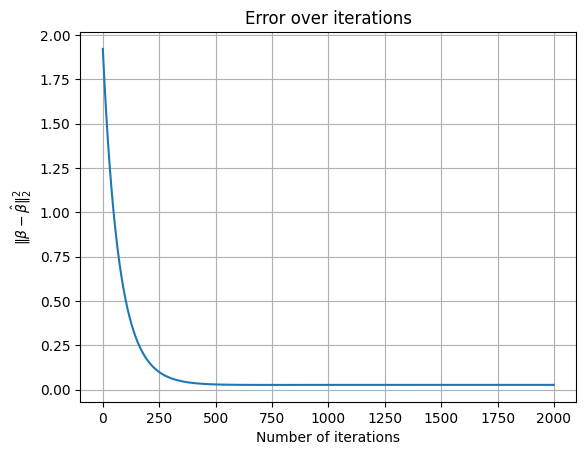

In [5]:
# Example - Logistic Regression

# Pt1.数据生成

import numpy as np
np.random.seed(2)  # 设定随机种子以确保结果可重复

n,p = 5000,4  # 设定训练数据的数量n和特征的维度p
X = np.random.uniform(-1,1,[n,p])  # 生成特征X
beta = np.random.uniform(-1,1,p)  # 生成模型参数beta
beta_0 = 0.5  # 设定截距项beta_0

logOdd = (X * beta).sum(axis=1) + beta_0  # 计算对数几率
Prob = np.exp(logOdd) / (1 + np.exp(logOdd))  # 计算正类的概率P(Y=1|X)

Y = np.array(Prob - np.random.uniform(0,1,n) > 0,dtype=int)  # 生成标签Y


# Pt2.梯度上升法训练逻辑回归模型

Beta_0_hat = 0.  # 初始化截距项
Beta_hat = np.zeros(p)  # 初始化参数
lamb = 0.1  # 学习率
Error = []  # 误差集合

# 使用梯度上升法进行迭代
for i in range(2000):  # 进行2000次迭代
    logOdd_hat = (X * Beta_hat).sum(axis=1) + Beta_0_hat
    Beta_0_hat = Beta_0_hat + lamb * np.mean(Y - np.exp(logOdd_hat) /
                 (1 + np.exp(logOdd_hat)))
    Beta_hat = Beta_hat + lamb * ((Y - np.exp(logOdd_hat) /
                 (1 + np.exp(logOdd_hat))) * X.T).mean(axis=1)
    Error.append(np.linalg.norm(Beta_hat - beta)**2)  # 计算并存储误差

# 画出迭代次数与误差的关系图
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 2000), Error)
plt.xlabel('Number of iterations')
plt.ylabel(r'$\Vert \beta - \hat{\beta}\Vert_2^2$') # LaTeX格式的公式表示L2范数平方
plt.title('Error over iterations')
plt.grid()
plt.show()


在逻辑回归参数估计的代码中，我们通过梯度上升法逐步调整$\hat{\beta}_0$和$\hat{\beta}$，目的是最大化对数似然函数。在每次迭代中，我们根据当前的参数估计计算每个样本的对数几率，然后使用这个对数几率来计算梯度并更新参数。

梯度上升更新规则是：

- 对于截距$\beta_0$，更新规则为：$\beta_0 \leftarrow \beta_0 + \lambda \cdot \text{mean}(Y - \text{predicted probability})$。

- 对于其他参数$\beta$，更新规则为：$\beta \leftarrow \beta + \lambda \cdot \text{mean}((Y - \text{predicted probability}) \cdot X)$。

最后，我们绘制了参数估计误差的平方范数$\Vert \beta - \hat{\beta}\Vert_2^2$随迭代次数的变化情况，以可视化模型训练过程中参数估计的准确性。


# 混淆矩阵（Confusion Matrix）


混淆矩阵是一个表格，用于展示分类模型对每个输入实例 $X$ 的分类结果的准确性和不准确性。它主要包含四个部分：

- **真正例（True Positive, TP）**：模型正确地将正类预测为正类的实例数量。
- **假正例（False Positive, FP）**：模型错误地将负类预测为正类的实例数量。
- **真负例（True Negative, TN）**：模型正确地将负类预测为负类的实例数量。
- **假负例（False Negative, FN）**：模型错误地将正类预测为负类的实例数量。

这四个指标共同构成了混淆矩阵，帮助我们从不同角度理解模型的表现。


# Classification metrics based on confusion matrix

### 1. 准确度（Accuracy）

准确度是用来衡量模型整体表现的一个指标，它是模型正确预测的实例总数与所有实例总数的比率。可以用以下公式表示：

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

其中：
- $TP$ 是真正例的数量。
- $TN$ 是真负例的数量。
- $FP$ 是假正例的数量。
- $FN$ 是假负例的数量。

准确度越高，表示模型的整体表现越好。但需要注意的是，当数据集的类别分布非常不均衡时，准确度可能不是一个很好的性能衡量指标。在这种情况下，可能需要考虑其他指标，如精确度（Precision）、召回率（Recall）或F1分数。

### 2. 精确度（Precision）

精确度是衡量模型正类预测的准确性的指标。简而言之，它回答了这样一个问题：“模型识别为正类的实例中，有多少比例是正确的？”

精确度定义为模型正确预测的正类（真正例，TP）数量与模型预测为正类的总数（真正例TP和假正例FP之和）的比率：

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

其中，$TP$是真正例的数量，$FP$是假正例的数量。

### 3. 召回率（Recall）

召回率衡量的是分类模型识别数据集中所有相关实例的有效性。基本上，它回答了这样一个问题：“所有实际正类中，有多少比例被模型正确识别？”

召回率定义为真正例（TP）的数量与实际正类的总数（真正例TP和假负例FN之和）的比率：

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

其中，$TP$是真正例的数量，$FN$是假负例的数量。

### 4. F1分数（F1-Score）

F1分数用于评估分类模型的总体性能。它是精确度和召回率的调和平均值，因此结合了精确度和召回率的信息。

F1分数被称为F1是因为它结合了精确度（P）和召回率（R）这两个其他指标。“F”代表“F-measure”或“F-score”，“1”表示它是精确度和召回率的调和平均值。

调和平均值通常用于计算比率或速率的平均值，可以表示为给定一组观测值的倒数的算术平均值的倒数。F1分数的计算公式为：

$$
F1\text{-score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

在这里，精确度和召回率的调和平均值比简单的平均值更重视较低的值，因此，F1分数只有在精确度和召回率都较高时才会高。

